# Exploration of the MIT-BIH-Database

### **Loading the Data and first Exploration**

In [1]:
# Load packages and Data

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

mitbih_test_df = pd.read_csv("mitbih_test.csv")
mitbih_train_df = pd.read_csv("mitbih_train.csv")

In [2]:
# MIT-BIH Train;  Basic Statistic and Exploration

# Renaming the columns
new_column_names = range(1, len(mitbih_train_df.columns) + 1)
mitbih_train_df.columns = new_column_names

# Transforming the Target Variable to Integer
mitbih_train_df[188]=mitbih_train_df[188].astype(int)

mitbih_train_df.describe()
mitbih_train_df[188].value_counts()

188
0    72470
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64

In [3]:
# MIT-BIH Test;  Basic Statistic and Exploration

# Renaming the columns
new_column_names = range(1, len(mitbih_test_df.columns) + 1)
mitbih_test_df.columns = new_column_names

# Transforming the Target Variable to Integer
mitbih_test_df[188]=mitbih_test_df[188].astype(int)

mitbih_test_df.info()
# mitbih_test_df.describe()
# mitbih_test_df[188].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21891 entries, 0 to 21890
Columns: 188 entries, 1 to 188
dtypes: float64(187), int64(1)
memory usage: 31.4 MB


In [4]:
# Verification that the values of all explanatory variables are between 0 and 1
print(mitbih_train_df.iloc[:,:-1].max().max())
print(mitbih_train_df.iloc[:,:-1].min().min())
print(mitbih_test_df.iloc[:,:-1].max().max())
print(mitbih_test_df.iloc[:,:-1].min().min())

1.0
0.0
1.0
0.0


### **First Visualization**

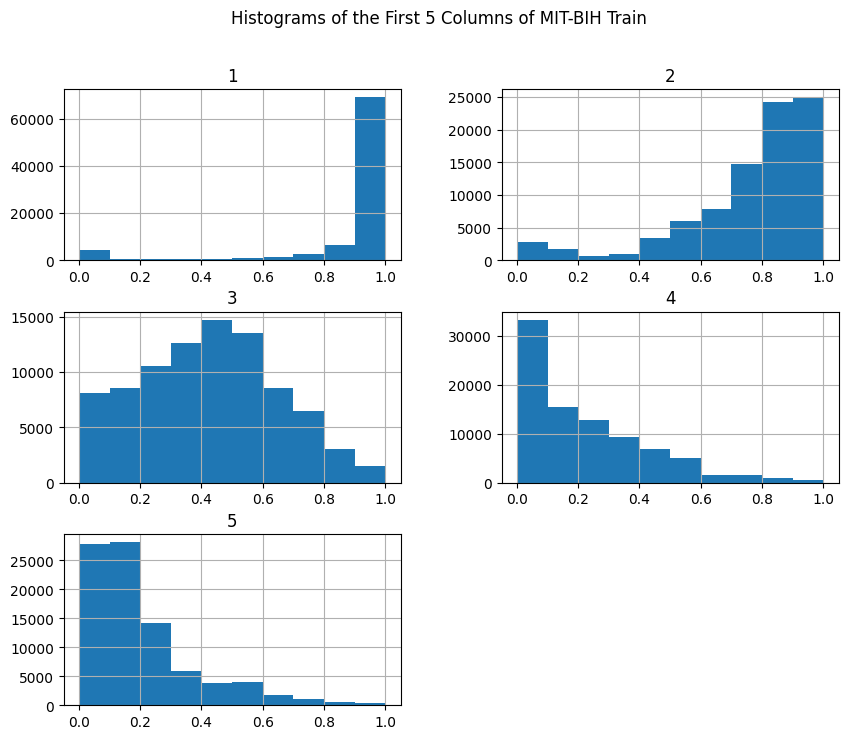

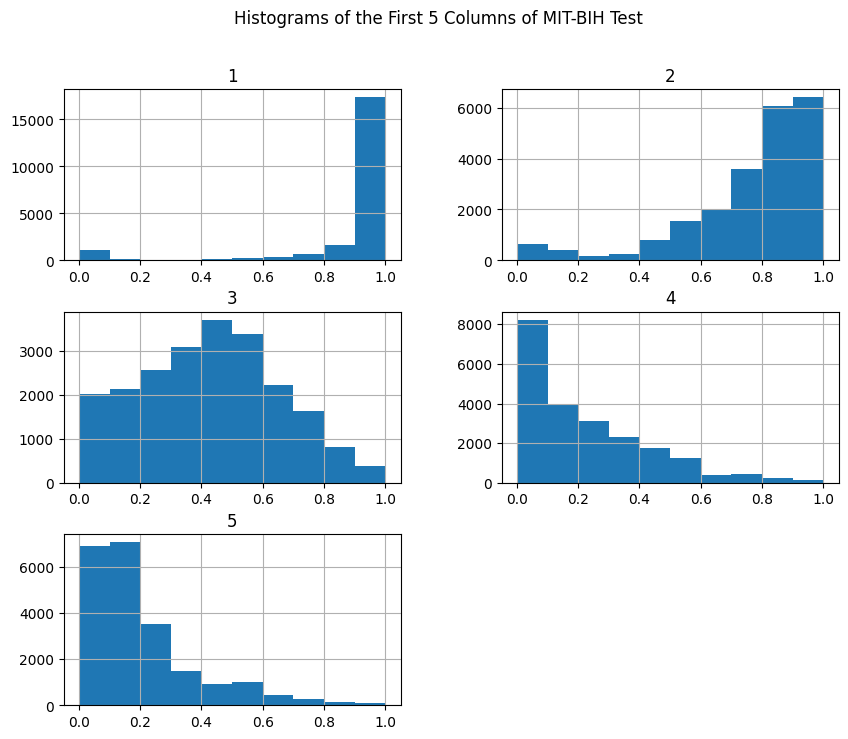

In [5]:
# Histograms of the first Columns

mitbih_train_df.iloc[:, :5].hist(figsize=(10, 8))
plt.suptitle('Histograms of the First 5 Columns of MIT-BIH Train')
plt.show()
mitbih_test_df.iloc[:, :5].hist(figsize=(10, 8))
plt.suptitle('Histograms of the First 5 Columns of MIT-BIH Test')
plt.show()

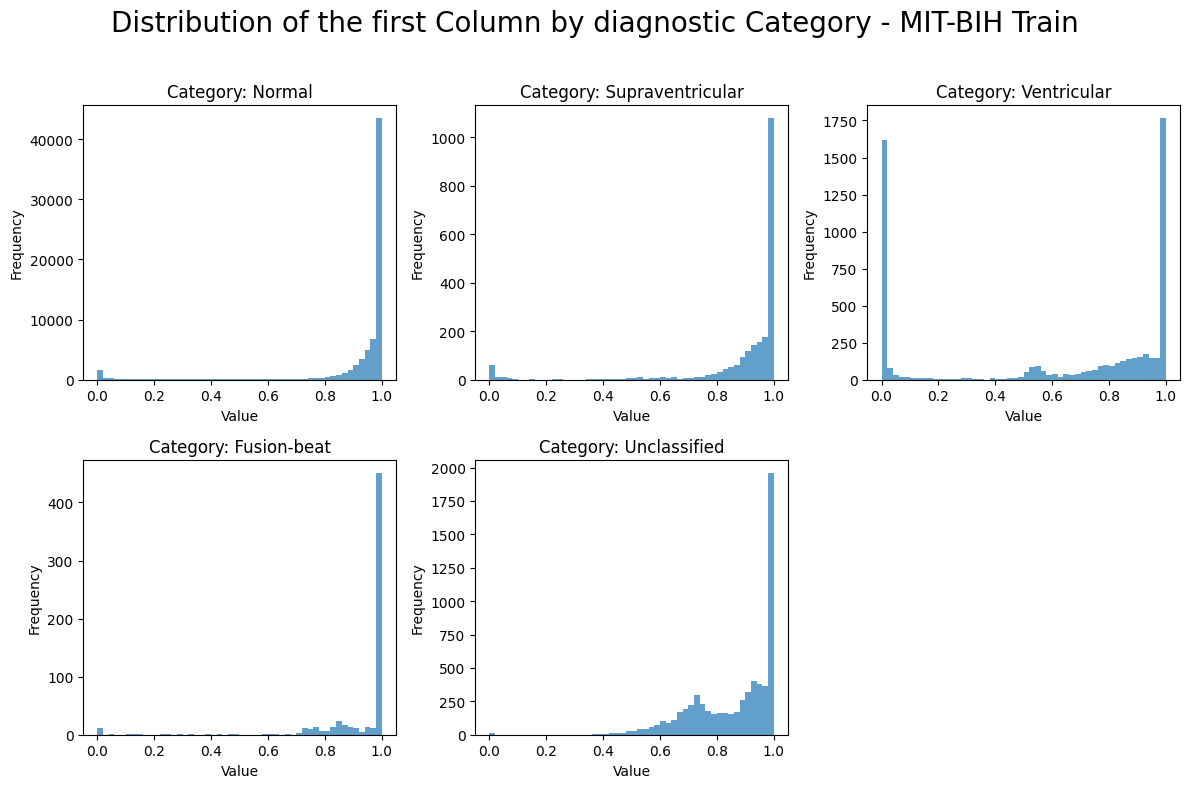

In [50]:
# Categories with the first letter capitalized
categories = ["Normal", "Supraventricular", "Ventricular", "Fusion-beat", "Unclassified"]

# Map categories to diagnostic class numbers (adjust this based on your specific data)
category_mapping = {
    0: "Normal",
    1: "Supraventricular",
    2: "Ventricular",
    3: "Fusion-beat",
    4: "Unclassified"
}

# Reverse the category mapping to get the class numbers
class_numbers = {v: k for k, v in category_mapping.items()}

plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    plt.subplot(2, 3, i + 1)
    subset_df = mitbih_train_df[mitbih_train_df[188] == class_numbers[category]]
    plt.hist(subset_df.iloc[:, 0], bins=50, alpha=0.7, label=f'Category {category}')
    plt.title(f'Category: {category}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Distribution of the first Column by diagnostic Category - MIT-BIH Train', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('MITBIH_dist_first_row.png')
plt.show()


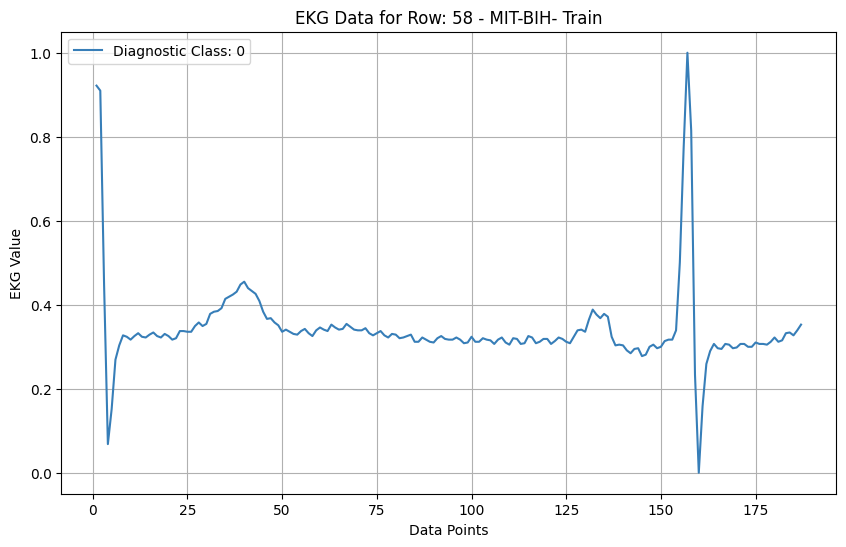

In [7]:
# Grafic Representation of raw Data (Single preprocessed EKG-Signal) - MIT-BIH Train 

# Choose Row to display: 
row_to_display = 58

plt.figure(figsize=(10, 6))
plt.plot(range(1, 188), mitbih_train_df.iloc[row_to_display, :187], 
         label = f"Diagnostic Class: {mitbih_train_df.iloc[row_to_display, 187]}", color='#377eb8')
plt.xlabel('Data Points')
plt.ylabel('EKG Value')
plt.title(f'EKG Data for Row: {row_to_display} - MIT-BIH- Train')
plt.legend()
plt.grid(True)
plt.show();

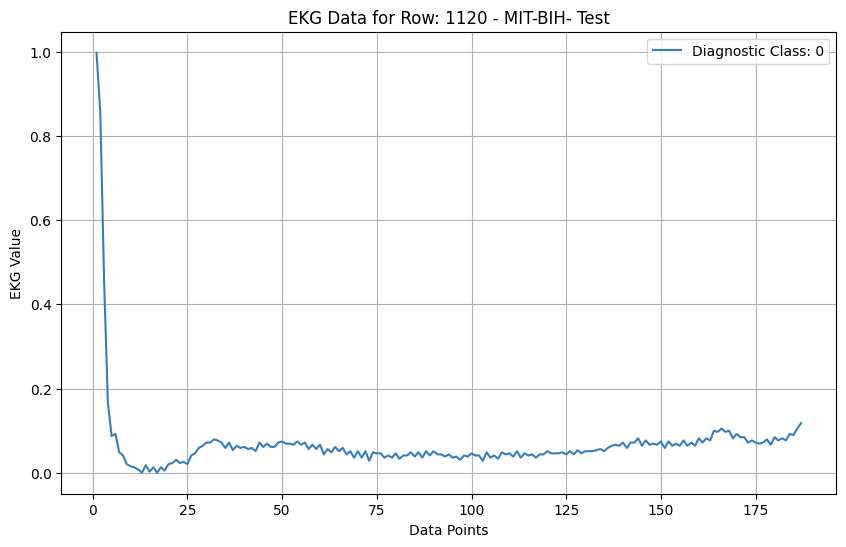

In [8]:
# Grafic Representation of raw Data (Single preprocessed EKG-Signal) - MIT-BIH Test 

# Choose Row to display: 
row_to_display = 1120

plt.figure(figsize=(10, 6))
plt.plot(range(1, 188), mitbih_test_df.iloc[row_to_display, :187], 
         label = f"Diagnostic Class: {mitbih_test_df.iloc[row_to_display, 187]}", color='#377eb8')
plt.xlabel('Data Points')
plt.ylabel('EKG Value')
plt.title(f'EKG Data for Row: {row_to_display} - MIT-BIH- Test')
plt.legend()
plt.grid(True)
plt.show();

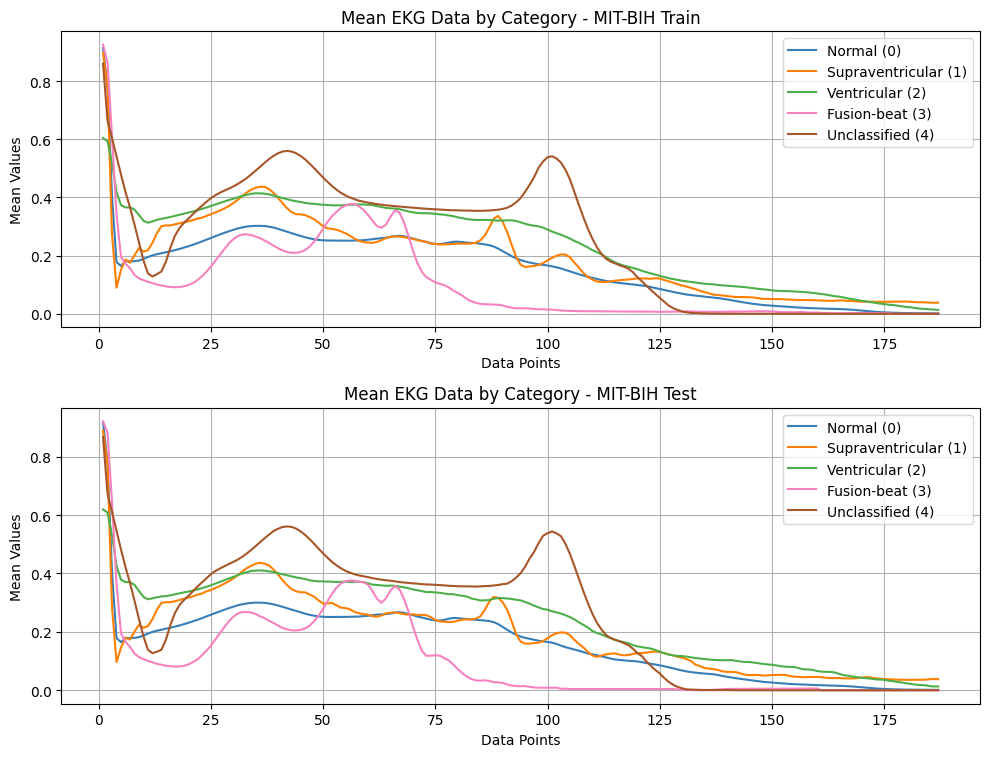

In [48]:
import matplotlib.pyplot as plt

# Categories with the first letter capitalized
categories = ["Normal", "Supraventricular", "Ventricular", "Fusion-beat", "Unclassified"]

# Map categories to diagnostic class numbers (adjust this based on your specific data)
category_mapping = {
    0: "Normal (0)",
    1: "Supraventricular (1)",
    2: "Ventricular (2)",
    3: "Fusion-beat (3)",
    4: "Unclassified (4)"
}

# Reverse the category mapping to get the class numbers
class_numbers = {v: k for k, v in category_mapping.items()}

# Define the colors for the plots
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628']

# First plot: Training data
grouped_train = mitbih_train_df.groupby(188)
means_train = grouped_train.mean()

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
for i, category in enumerate(means_train.index):
    category_name = category_mapping[category]
    plt.plot(range(1, 188), means_train.loc[category], label=f'{category_name}', color=colors[i])
plt.xlabel('Data Points')
plt.ylabel('Mean Values')
plt.title('Mean EKG Data by Category - MIT-BIH Train')
plt.legend()
plt.grid(True)

# Second plot: Testing data
grouped_test = mitbih_test_df.groupby(188)
means_test = grouped_test.mean()

plt.subplot(2, 1, 2)
for i, category in enumerate(means_test.index):
    category_name = category_mapping[category]
    plt.plot(range(1, 188), means_test.loc[category], label=f'{category_name}', color=colors[i])
plt.xlabel('Data Points')
plt.ylabel('Mean Values')
plt.title('Mean EKG Data by Category - MIT-BIH Test')
plt.legend()
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('mean_ekg_data_mit_bih.png')
plt.show()


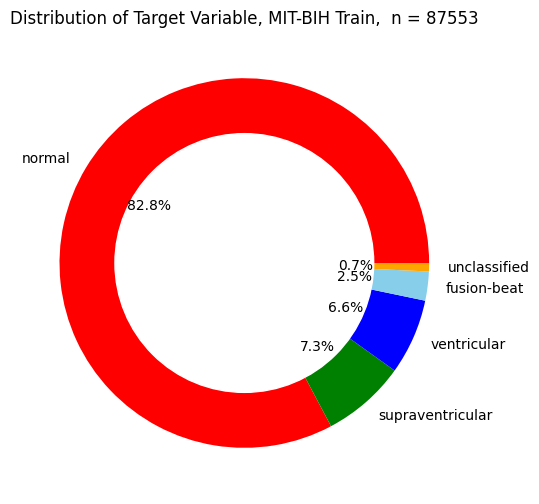

In [11]:
# Distribution of Classes in MIT-BIH-Train

equilibre=mitbih_train_df[188].value_counts()
# equilibre.head()

plt.figure(figsize=(12,6))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=["normal", "supraventricular", "ventricular", "fusion-beat", "unclassified"], 
        colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title(f"Distribution of Target Variable, MIT-BIH Train,  n = {mitbih_train_df.shape[0]}")
plt.show();

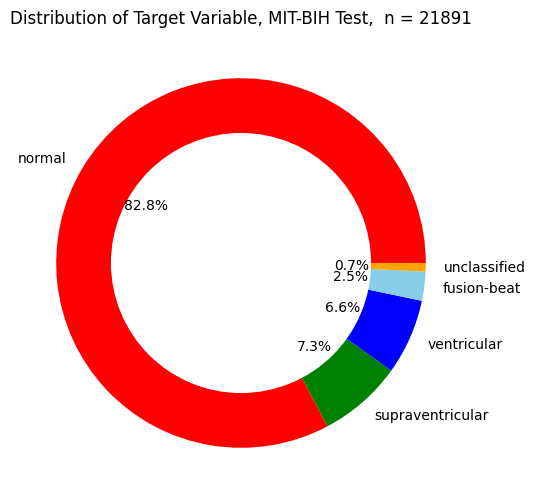

In [12]:
# Distribution of Classes in MIT-BIH-Test

equilibre=mitbih_test_df[188].value_counts()
# equilibre.head()

plt.figure(figsize=(12,6))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=["normal", "supraventricular", "ventricular", "fusion-beat", "unclassified"], 
        colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title(f"Distribution of Target Variable, MIT-BIH Test,  n = {mitbih_test_df.shape[0]}")
plt.show();

In [ ]:
categories = ["normal", "supraventricular", "ventricular", "fusion-beat", "unclassified"]

plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    plt.subplot(2, 3, i + 1)
    subset_df = ptbdb_comb_df[ptbdb_comb_df[188] == category]
    plt.hist(subset_df.iloc[:, 0], bins=50, alpha=0.7, label=f'Category {category}')
    plt.title(f'Category: {category}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Distribution of the first Column by diagnostic Category - PTBDB', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('PTBDB_dist_first_row.png')
plt.show()

### **Grafic with Interpretation Nr. 1**
#### **Comparison of QRS-Peaks of explanatory Variables with the mean by Category (MIT-BIH - Train)**

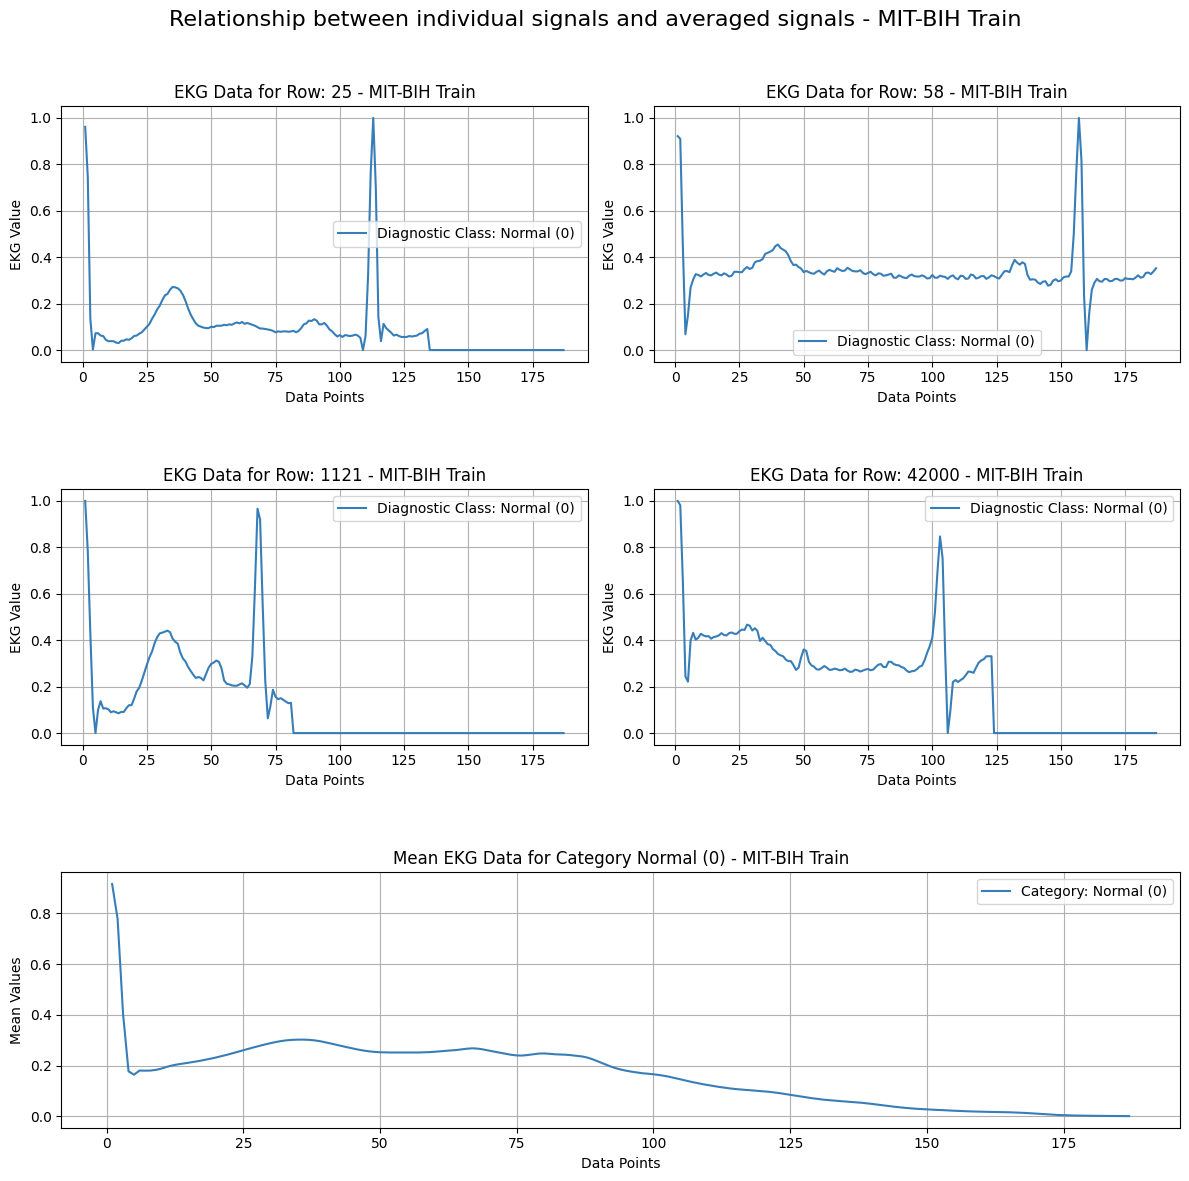

In [47]:
import matplotlib.pyplot as plt

# Updated category mapping
category_mapping = {
    0: "Normal (0)",
    1: "Supraventricular (1)",
    2: "Ventricular (2)",
    3: "Fusion-beat (3)",
    4: "Unclassified (4)"
}

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Plot 1
category_label = category_mapping[mitbih_train_df.iloc[25, 187]]
axs[0, 0].plot(range(1, 188), mitbih_train_df.iloc[25, :187], 
               label=f"Diagnostic Class: {category_label}", color='#377eb8')
axs[0, 0].set_xlabel('Data Points')
axs[0, 0].set_ylabel('EKG Value')
axs[0, 0].set_title('EKG Data for Row: 25 - MIT-BIH Train')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot 2
category_label = category_mapping[mitbih_train_df.iloc[58, 187]]
axs[0, 1].plot(range(1, 188), mitbih_train_df.iloc[58, :187], 
               label=f"Diagnostic Class: {category_label}", color='#377eb8')
axs[0, 1].set_xlabel('Data Points')
axs[0, 1].set_ylabel('EKG Value')
axs[0, 1].set_title('EKG Data for Row: 58 - MIT-BIH Train')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot 3
category_label = category_mapping[mitbih_train_df.iloc[1121, 187]]
axs[1, 0].plot(range(1, 188), mitbih_train_df.iloc[1121, :187], 
               label=f"Diagnostic Class: {category_label}", color='#377eb8')
axs[1, 0].set_xlabel('Data Points')
axs[1, 0].set_ylabel('EKG Value')
axs[1, 0].set_title('EKG Data for Row: 1121 - MIT-BIH Train')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot 4
category_label = category_mapping[mitbih_train_df.iloc[42000, 187]]
axs[1, 1].plot(range(1, 188), mitbih_train_df.iloc[42000, :187], 
               label=f"Diagnostic Class: {category_label}", color='#377eb8')
axs[1, 1].set_xlabel('Data Points')
axs[1, 1].set_ylabel('EKG Value')
axs[1, 1].set_title('EKG Data for Row: 42000 - MIT-BIH Train')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Displaying the Mean by category in a larger subplot spanning the entire bottom row
axs[2, 0].remove()  # Remove the subplot at position [2, 0] to merge cells
axs[2, 1].remove()  # Remove the subplot at position [2, 1] to merge cells
ax_mean = fig.add_subplot(3, 2, (5, 6))

grouped = mitbih_train_df.groupby(188)
means = grouped.mean()
category_0_mean = means.loc[0]  # Assuming 0 is 'Normal', adjust if necessary
ax_mean.plot(range(1, 188), category_0_mean, label='Category: Normal (0)', color='#377eb8')

ax_mean.set_xlabel('Data Points')
ax_mean.set_ylabel('Mean Values')
ax_mean.set_title('Mean EKG Data for Category Normal (0) - MIT-BIH Train')
ax_mean.legend()
ax_mean.grid(True)

fig.suptitle('Relationship between individual signals and averaged signals - MIT-BIH Train', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for the main title
plt.subplots_adjust(hspace=0.5)  # Increase the space between subplots if needed
plt.savefig('mit_bih_signal_korrelation_normal.png')
plt.show()


#### **Interpretation and Conclusions:**
- The graph shows 4 examples of the raw EKG-Data over the time; for each of this subplots the P-Wave, QRS-Complex, T-Wave are distinguishable
- In the 4 examples of the raw Data there is a peak at Data point 0 - 3, rapidly falling afterwards, the padding with zeros starts at different Data Points, but if then at the end of the Data-Points-Row
- All 4 examples of raw data belong to Diagnostic Class 0 (Normal Heartbeat)
- The QRS-Komplexes in all the examples appear at different Data Points
- The last Grafic shows the mean value for Diagnostic Class 0 (Normal Heartbeat) over the time
- The mean value shows that on average the ECG activity is strong at the beginning and then gradually decreases, while having peaks at Data Point 25-40, 60 and 80.
- It can be said that the mean EKG-Data is not Diagnostic for the Class anymore, it does not even resemble a EKG-Signal anymore
- This is most likely due to the preprocessing as well as to the alterating Peaks of the QRS-Komplexes
- It would be interesting to see the mean value after centering the Data around the QRS-KOmplexes (I do not know how to do something linke that yet)
- This knowledge of the Distribution is important and needs to be considered expecially when modelling the Data, maybe further preprocessing is possible/ necessary

### **Histograms for Data Density - MIT-BIH Train**

In [14]:
# 2D-Histogram for classes; Density of Data Distribution

def plot_hist(class_number, size, min_, bins):
    img = mitbih_train_df.loc[mitbih_train_df[188] == class_number].values[:, min_:size]
    img_flatten = img.flatten()
    final1 = np.tile(np.arange(min_, size), img.shape[0])
    
    print(len(final1))
    print(len(img_flatten))
    
    plt.figure(figsize=(12, 6))
    plt.hist2d(final1, img_flatten, bins=(bins, bins), cmap=plt.cm.jet)
    plt.colorbar()
    plt.show()

4710550
4710550


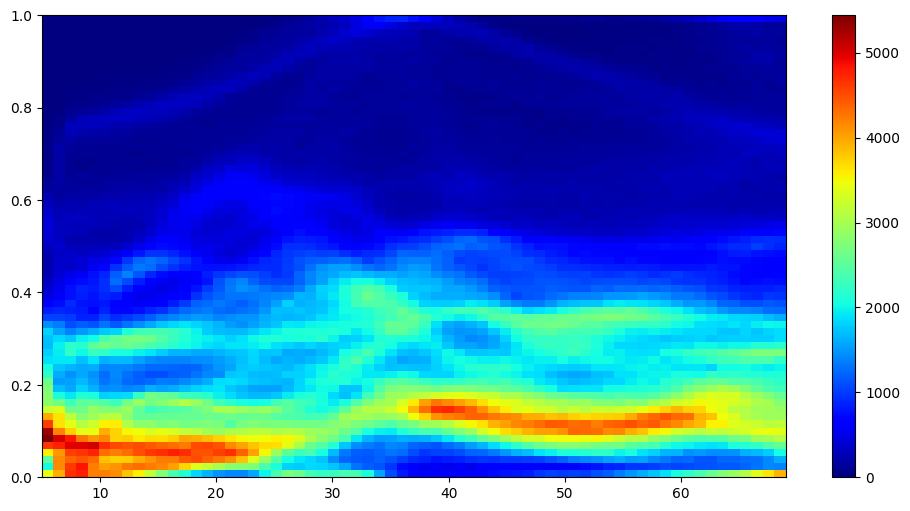

In [15]:
plot_hist(0,70,5,65)

100035
100035


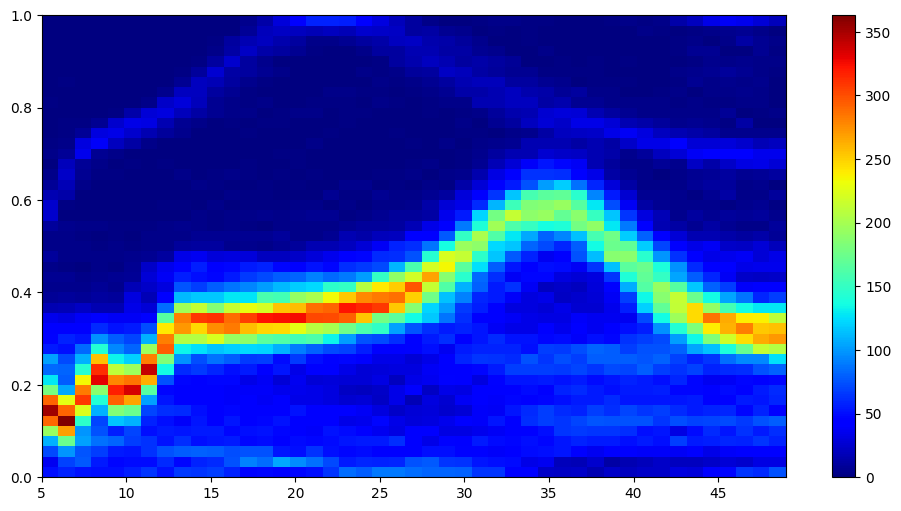

In [16]:
plot_hist(1,50,5,45)

260460
260460


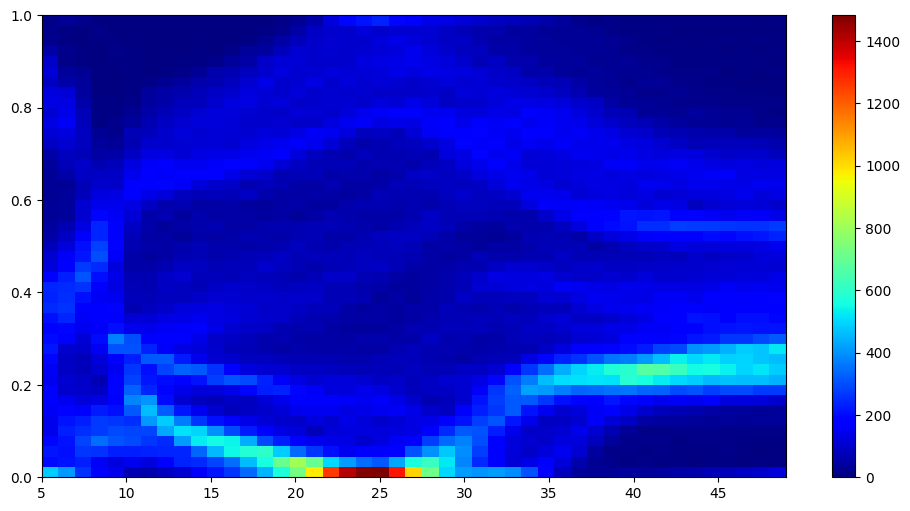

In [17]:
plot_hist(2,50,5,45)

28845
28845


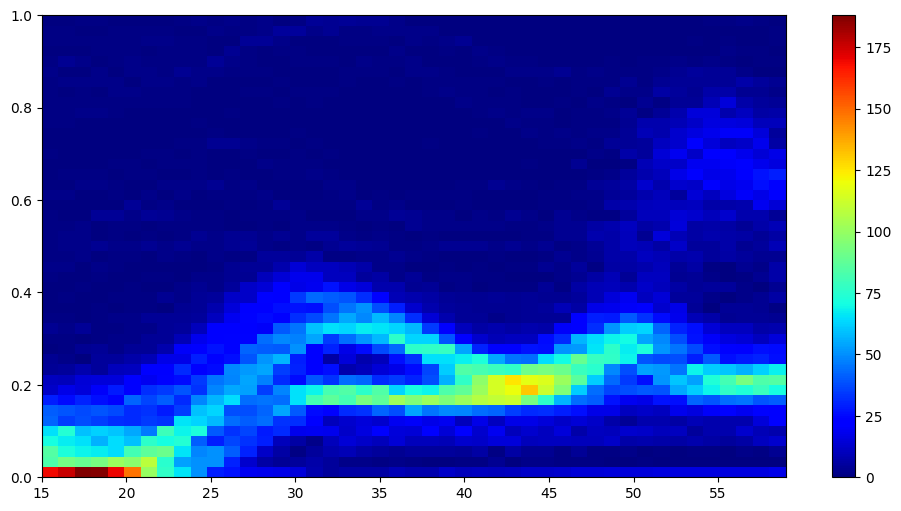

In [18]:
plot_hist(3,60,15,45)

225085
225085


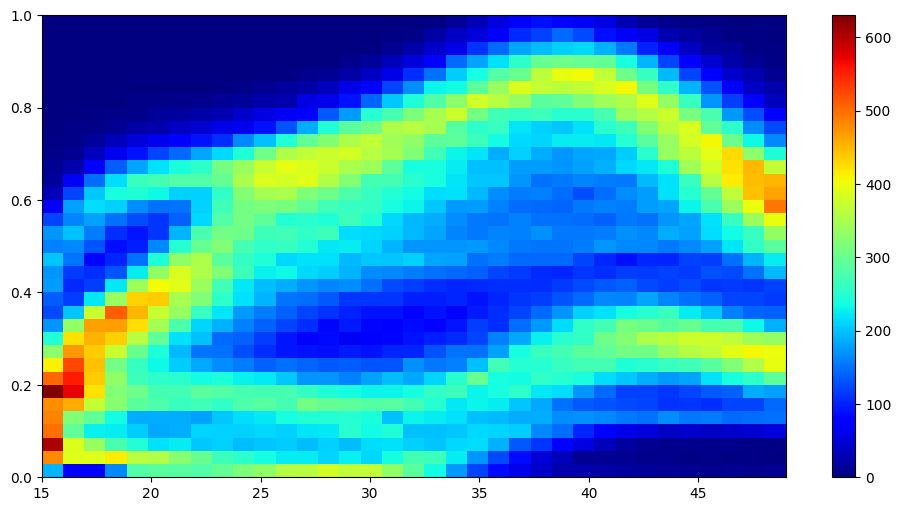

In [19]:
plot_hist(4,50,15,35)

### **First Statistical Evaluation**

In [20]:
# Pearson Correlation - MIT-BIH Train

#plt.figure(figsize=(16,15))
#sns.heatmap(mitbih_train_df.corr(),  annot=True, cmap="RdBu_r", center =0);

# Does this already qualify as modern art?

In [21]:
# Pearson Correlation - MIT-BIH Test

#plt.figure(figsize=(16,15))
#sns.heatmap(mitbih_train_df.corr(),  annot=True, cmap="RdBu_r", center =0);


### **Grafic with Interpretation Nr. 2**
#### **Distribution of the Columns - Seperated by Category (MIT-BIH - Train)**

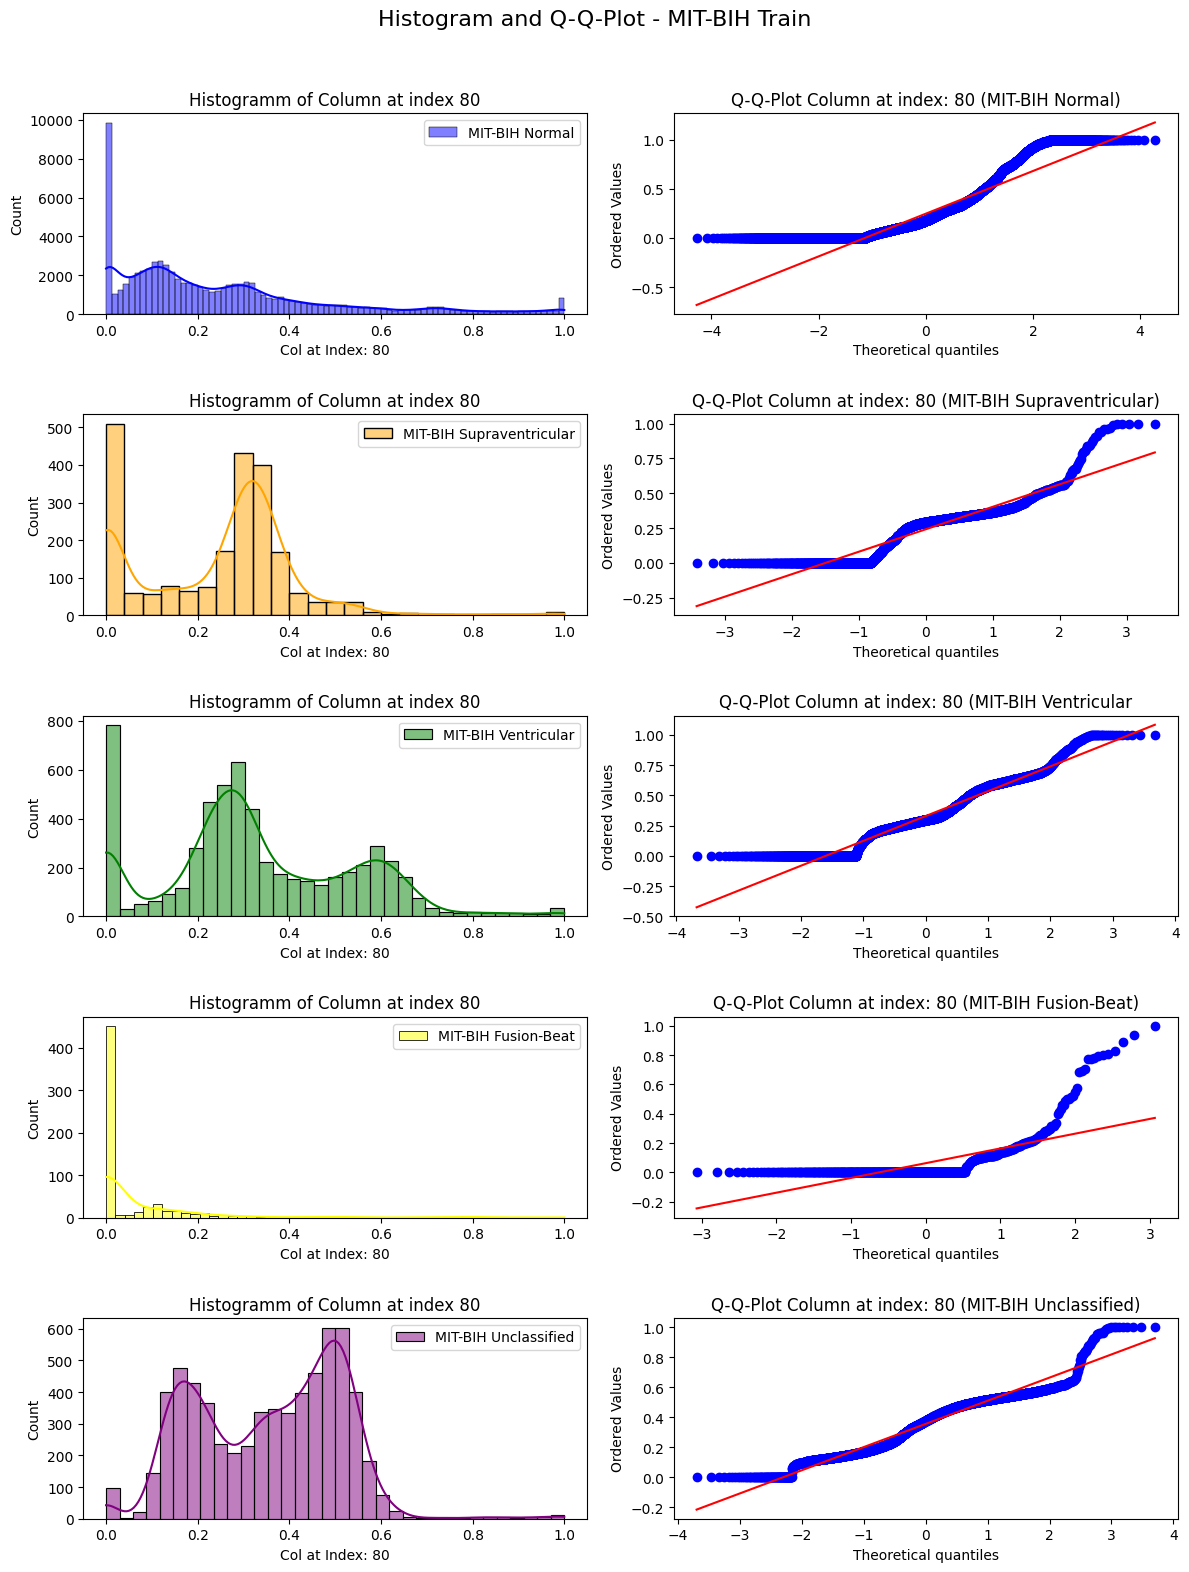

In [57]:
# Normal-Distribution of the explanatory variables? - Visual - MIT-BIH Train
# Seperated by the target variable.

# Choose Column to Check: 
column = 80

X = mitbih_train_df.iloc[:, :-1]  
y = mitbih_train_df.iloc[:, -1]   
normal = X[y == 0]
supraventricular = X[y == 1]
ventricular = X[y == 2]
fusion = X[y == 3]
unclassified = X[y == 4]

plt.figure(figsize=(12, 16))

plt.subplot(5, 2, 1)
sns.histplot(normal.iloc[:, column], kde=True, color='blue', label='MIT-BIH Normal')
plt.xlabel(f"Col at Index: {column}")
plt.legend()
plt.title(f'Histogramm of Column at index {column}')

plt.subplot(5, 2, 3)
sns.histplot(supraventricular.iloc[:, column], kde=True, color='orange', label='MIT-BIH Supraventricular')
plt.xlabel(f"Col at Index: {column}")
plt.legend()
plt.title(f'Histogramm of Column at index {column}')

plt.subplot(5, 2, 5)
sns.histplot(ventricular.iloc[:, column], kde=True, color='green', label='MIT-BIH Ventricular')
plt.xlabel(f"Col at Index: {column}")
plt.legend()
plt.title(f'Histogramm of Column at index {column}')

plt.subplot(5, 2, 7)
sns.histplot(fusion.iloc[:, column], kde=True, color='yellow', label='MIT-BIH Fusion-Beat')
plt.xlabel(f"Col at Index: {column}")
plt.legend()
plt.title(f'Histogramm of Column at index {column}')

plt.subplot(5, 2, 9)
sns.histplot(unclassified.iloc[:, column], kde=True, color='purple', label='MIT-BIH Unclassified')
plt.xlabel(f"Col at Index: {column}")
plt.legend()
plt.title(f'Histogramm of Column at index {column}')

plt.subplot(5, 2, 2)
stats.probplot(normal.iloc[:, column], dist="norm", plot=plt)
plt.title(f'Q-Q-Plot Column at index: {column} (MIT-BIH Normal)')

plt.subplot(5, 2, 4)
stats.probplot(supraventricular.iloc[:, column], dist="norm", plot=plt)
plt.title(f'Q-Q-Plot Column at index: {column} (MIT-BIH Supraventricular)')

plt.subplot(5, 2, 6)
stats.probplot(ventricular.iloc[:, column], dist="norm", plot=plt)
plt.title(f'Q-Q-Plot Column at index: {column} (MIT-BIH Ventricular')

plt.subplot(5, 2, 8)
stats.probplot(fusion.iloc[:, column], dist="norm", plot=plt)
plt.title(f'Q-Q-Plot Column at index: {column} (MIT-BIH Fusion-Beat)')

plt.subplot(5, 2, 10)
stats.probplot(unclassified.iloc[:, column], dist="norm", plot=plt)
plt.title(f'Q-Q-Plot Column at index: {column} (MIT-BIH Unclassified)')

plt.suptitle('Histogram and Q-Q-Plot - MIT-BIH Train', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for the main title
plt.subplots_adjust(hspace=0.5)  # Increase the space between subplots if needed
plt.savefig('hist_qq_MITBIH.png')
plt.show()
plt.show(); 

In [56]:
# Check for normal Distribution of the columns with D'Agostino and Pearson's Normality Test - MIT-BIH Train

X = mitbih_test_df.iloc[:, :-1]  
y = mitbih_test_df.iloc[:, -1]   
normal = X[y == 0]
supraventricular = X[y == 1]
ventricular = X[y == 2]
fusion = X[y == 3]
unclassified = X[y == 4]

def check_normality(data, alpha=0.05):
    stat, p = normaltest(data)
    return p > alpha, stat, p

# List of categories
categories = {
    'normal': normal,
    'supraventricular': supraventricular,
    'ventricular': ventricular,
    'fusion': fusion,
    'unclassified': unclassified
}

# Perform the normality test for each column in each category and store the results
normality_results = []

for column in X.columns:
    for category_name, category_data in categories.items():
        is_normal, stat, p = check_normality(category_data[column])
        normality_results.append({
            'Variable': column,
            'Category': category_name,
            'is_normal': is_normal,
            'dagostino_stat': stat,
            'p_val': p
        })

# Convert results to DataFrame
results_df = pd.DataFrame(normality_results)

# print(results_df.head(50))

filtered_results_df = results_df[results_df['p_val'] > 0.05]

# print("Reslts of Testing for Normality (MIT-BIH Train) - Seperated by Diagnostic Category \n", results_df.head(20), "\n")
print("Number of Rows of Results: ", results_df.shape[0], "\n")
print("Filtered Reslts of Testing for Normality (MIT-BIH Train) - Rows with assumed Normal Distribution - Seperated by Diagnostic Category\n",
       filtered_results_df)

Number of Rows of Results:  935 

Filtered Reslts of Testing for Normality (MIT-BIH Train) - Rows with assumed Normal Distribution - Seperated by Diagnostic Category
      Variable          Category  is_normal  dagostino_stat     p_val
151        31  supraventricular       True        2.844538  0.241166
156        32  supraventricular       True        1.822854  0.401950
206        42  supraventricular       True        0.272334  0.872697
404        81      unclassified       True        2.169053  0.338062
409        82      unclassified       True        3.093586  0.212930
429        86      unclassified       True        5.393187  0.067435
439        88      unclassified       True        3.414377  0.181375
444        89      unclassified       True        0.359485  0.835485
449        90      unclassified       True        5.155887  0.075930
454        91      unclassified       True        1.928847  0.381203


In [ ]:
# Check for normal Distribution of the columns with D'Agostino and Pearson's Normality Test - MIT-BIH Test

from scipy.stats import normaltest

def check_normality(data, alpha=0.05):
    stat, p = normaltest(data)
    return p > alpha, stat, p

# List of categories
categories = {
    'normal': normal,
    'supraventricular': supraventricular,
    'ventricular': ventricular,
    'fusion': fusion,
    'unclassified': unclassified
}

# Perform the normality test for each column in each category and store the results
normality_results = []

for column in X.columns:
    for category_name, category_data in categories.items():
        is_normal, stat, p = check_normality(category_data[column])
        normality_results.append({
            'Variable': column,
            'Category': category_name,
            'is_normal': is_normal,
            'dagostino_stat': stat,
            'p_val': p
        })

# Convert results to DataFrame
results_df = pd.DataFrame(normality_results)

# print(results_df.head(50))

filtered_results_df = results_df[results_df['p_val'] > 0.05]

# print("Reslts of Testing for Normality (MIT-BIH Train) - Seperated by Diagnostic Category \n", results_df.head(20), "\n")
print("Number of Rows of Results: ", results_df.shape[0], "\n")
print("Filtered Reslts of Testing for Normality (MIT-BIH Train) - Rows with assumed Normal Distribution - Seperated by Diagnostic Category\n",
       filtered_results_df)

#### **Interpretation and Conclusions:**
- asdf

MIT-BIH- Summary: 
- Potential distortion from cropping, (downsampling) and padding with zeros; The QRS-Complexes are not zentered; 
some entries contain no valuable information (1120); peak at Column 1-5; 
- no missing values
- the values of all explanatory variables are normalized continous variables with values between 0 and 1
- the target-variable is a nominal categorical variable (0-4)
- Numbe of entries: Test-Dataset: 21k; Train-Dataset: 87k
- All Data: Float 64
- Variable 1-187: Features; Variable 188: Target (0-4)


### **First Conclusions** !!!
- 14550 Entries; Normal: 4045 (27,8%); Abnormal: 10505
- There are no missing values
- The values of all explanatory variables are normalized continous variables with values between 0 and 1
- The target variable is a nominal categorical variable with a value of 0 or 1
- None of the explanatory variables is normal distributed (Shapiro-Wilk-Test)

### **Challenges** !!!
- There is a potential distortion from cropping, (downsampling) and padding with zeros
- The QRS-Complexes are not centered
- peak at Column 1-3; 
- A further challenge is that the distinction between pathologies is only possible when using the original dataset (with the kaggle Dataset there is "only" Normal and Abnormal)
- Structural problem of "only" a heatbeat, Normal EKG-Data contains more than one heartbeat because it has diagnostic relevance